In [1]:
import pandas as pd
data = pd.read_csv('D:\\4. Fourth Year\\Academic(Sem2)\\DSCI 44052\\Assignments\\project\\final\\imputed_processed_data.csv')

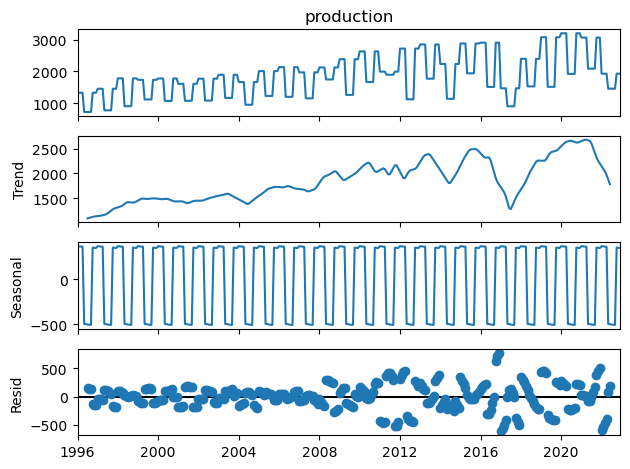

In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the 'date' column to datetime and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Decompose the production series
result = seasonal_decompose(data['production'], model='additive', period=12)  # Assuming monthly data

# Plot the decomposition
result.plot()
plt.show()

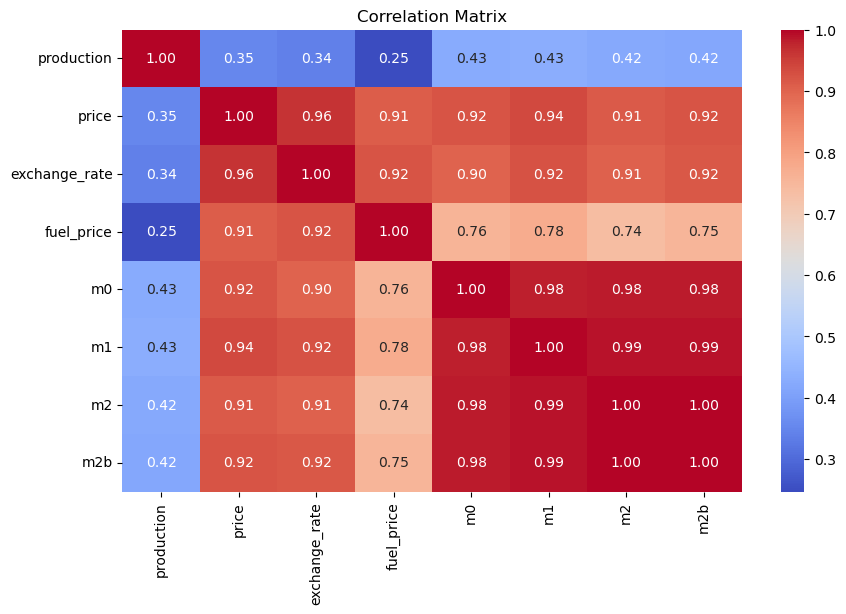

In [5]:
# Correlation matrix for production and other variables
correlation_matrix = data[['production', 'price', 'exchange_rate', 'fuel_price', 'm0', 'm1', 'm2', 'm2b']].corr()

# Plot the correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

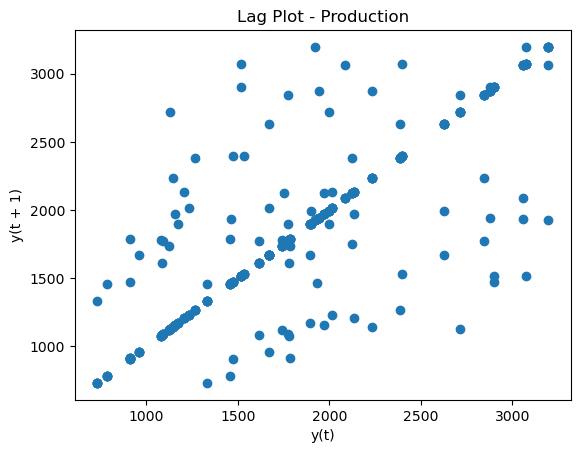

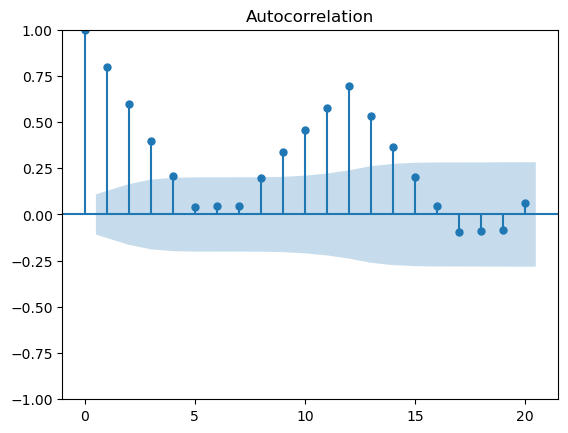

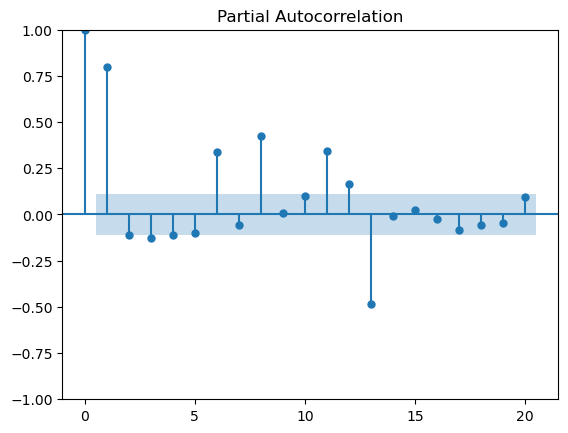

In [7]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Lag plot for production
lag_plot(data['production'])
plt.title('Lag Plot - Production')
plt.show()

# Autocorrelation and Partial Autocorrelation plot for production
plot_acf(data['production'], lags=20)
plt.show()

plot_pacf(data['production'], lags=20)
plt.show()

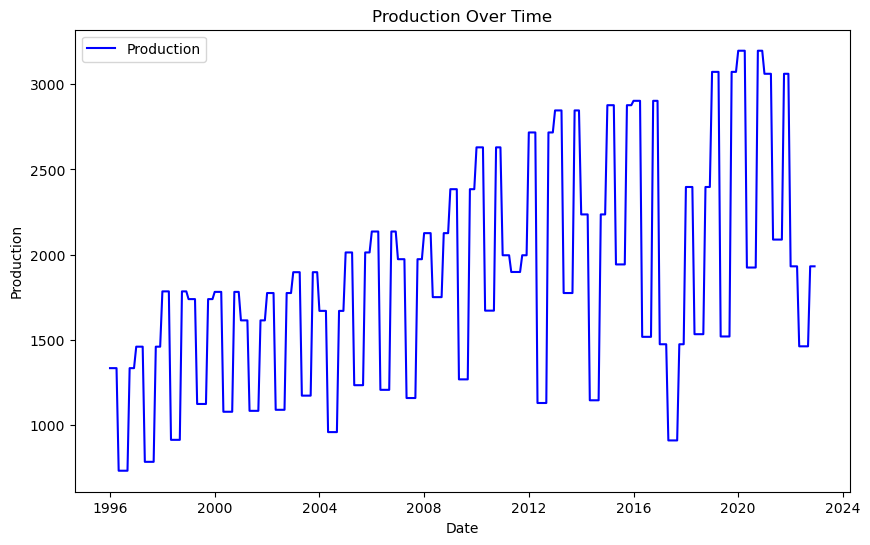

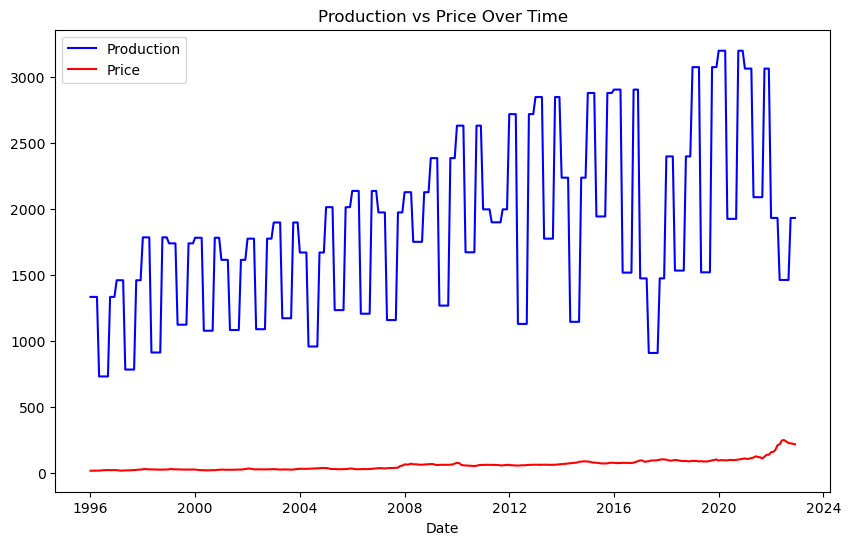

In [9]:
# Plot production over time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['production'], label='Production', color='b')
plt.title('Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()

# Plot production vs price
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['production'], label='Production', color='b')
plt.plot(data.index, data['price'], label='Price', color='r')
plt.title('Production vs Price Over Time')
plt.xlabel('Date')
plt.legend()
plt.show()

In [11]:
import statsmodels.api as sm

# Define independent variables (including a constant for the regression)
X = data[['price', 'exchange_rate', 'fuel_price', 'm0', 'm1', 'm2', 'm2b']]
X = sm.add_constant(X)

# Define the dependent variable
y = data['production']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             production   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     18.61
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           9.57e-21
Time:                        20:55:42   Log-Likelihood:                -2495.2
No. Observations:                 324   AIC:                             5006.
Df Residuals:                     316   BIC:                             5037.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           371.0398    292.836      1.267